# EDA and Data Visualization of GHG Emissions in the Philippines

In [99]:
library(tidyverse)
library(lubridate)
library(ggplot2)
library(DT)
library(skimr)
library(janitor)
library(reshape2)

In [141]:
options(repr.plot.width = 15, repr.plot.height = 8, repr.plot.res=130, repr.plot.pointsize=12)

In [142]:
# Replace with your actual file path if local
ghg_data <- read_csv("phil_synthetic_ghg_emissions_2010_2050.csv", show_col_types = FALSE)

head(ghg_data)

Year,Sector,CO2,CH4,N2O,HFCs
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2010,AGRICULTURE TOTAL CO2 EQUIVALENT,43152.00,NA,NA,NA
2015,AGRICULTURE TOTAL CO2 EQUIVALENT,52703.55,NA,NA,NA
2020,AGRICULTURE TOTAL CO2 EQUIVALENT,54080.00,NA,NA,NA
2021,AGRICULTURE TOTAL CO2 EQUIVALENT,56535.31,NA,NA,NA
2022,AGRICULTURE TOTAL CO2 EQUIVALENT,57628.11,NA,NA,NA
2023,AGRICULTURE TOTAL CO2 EQUIVALENT,58720.91,NA,NA,NA


In [143]:
# Basic stat summary
summary(ghg_data)

      Year         Sector               CO2               CH4          
 Min.   :2010   Length:1515        Min.   :-132995   Min.   : -216.99  
 1st Qu.:2026   Class :character   1st Qu.:    478   1st Qu.:    1.82  
 Median :2034   Mode  :character   Median :  10670   Median :   65.34  
 Mean   :2034                      Mean   :  34899   Mean   : 7314.15  
 3rd Qu.:2042                      3rd Qu.:  37516   3rd Qu.: 3873.14  
 Max.   :2050                      Max.   : 520984   Max.   :71177.31  
                                   NA's   :398       NA's   :632       
      N2O                HFCs      
 Min.   :  -33.31   Min.   :  771  
 1st Qu.:   17.78   1st Qu.: 4566  
 Median :  336.66   Median : 6412  
 Mean   : 2321.12   Mean   : 6328  
 3rd Qu.: 1747.74   3rd Qu.: 8257  
 Max.   :34560.18   Max.   :10103  
 NA's   :701        NA's   :1449   

In [144]:
# Check for missing values
colSums(is.na(ghg_data))

Year Sector    CO2    CH4    N2O   HFCs 
     0      0    398    632    701   1449

In [145]:
# Check structure
str(ghg_data)

spc_tbl_ [1,515 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Year  : num [1:1515] 2010 2015 2020 2021 2022 ...
 $ Sector: chr [1:1515] "AGRICULTURE TOTAL CO2 EQUIVALENT" "AGRICULTURE TOTAL CO2 EQUIVALENT" "AGRICULTURE TOTAL CO2 EQUIVALENT" "AGRICULTURE TOTAL CO2 EQUIVALENT" ...
 $ CO2   : num [1:1515] 43152 52704 54080 56535 57628 ...
 $ CH4   : num [1:1515] NA NA NA NA NA NA NA NA NA NA ...
 $ N2O   : num [1:1515] NA NA NA NA NA NA NA NA NA NA ...
 $ HFCs  : num [1:1515] NA NA NA NA NA NA NA NA NA NA ...
 - attr(*, "spec")=
  .. cols(
  ..   Year = col_double(),
  ..   Sector = col_character(),
  ..   CO2 = col_double(),
  ..   CH4 = col_double(),
  ..   N2O = col_double(),
  ..   HFCs = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [146]:
# Display column names using colnames()
column_names <- colnames(ghg_data)
print(column_names)

[1] "Year"   "Sector" "CO2"    "CH4"    "N2O"    "HFCs"  


In [147]:
# Unique sectors
unique_sectors <- unique(ghg_data$Sector)
length(unique_sectors)  # Number of sectors
unique_sectors

[1] 46

[1] "AGRICULTURE TOTAL CO2 EQUIVALENT"                          
 [2] "AGRICULTURE TOTAL EMISSIONS"                               
 [3] "Biological Treatment of Solid Waste"                       
 [4] "Biomass Burning - Forests"                                 
 [5] "Biomass Burning in Croplands and Grasslands"               
 [6] "Biomass Carbon Stock"                                      
 [7] "Biomass Carbon Stock Agroforestry/Perennial Crop"          
 [8] "Biomass Carbon Stock Deforestation"                        
 [9] "Biomass Carbon Stock Silvopasture"                         
[10] "Chemical Industry"                                         
[11] "Direct N2O Emissions from Managed Soils"                   
[12] "Direct N2O Emissions from Manure Management"               
[13] "Domestic Aviation"                                         
[14] "ENERGY TOTAL CO2 EQUIVALENT"                               
[15] "ENERGY TOTAL EMISSIONS"                                    
[16] "Energy Industries"                                         
[17] "Enteric Fermentation"                                      
[18] "FORESTRY AND OTHER LAND USE TOTAL CO2 EQUIVALENT"          
[19] "FORESTRY AND OTHER LAND USE TOTAL EMISSIONS"               
[20] "Fugitive Emissions - Oil and Natural Gas"                  
[21] "Fugitive Emissions - Solid Fuels"                          
[22] "INDUSTRIAL PROCESS AND PRODUCT USE TOTAL CO2 EQUIVALENT"   
[23] "INDUSTRIAL PROCESSES AND PRODUCT USE TOTAL EMISSIONS"      
[24] "Incineration and Open Burning of Waste"                    
[25] "Indirect N2O Emissions from Managed Soils"                 
[26] "Liming"                                                    
[27] "Manufacturing Industries and Construction"                 
[28] "Manure Management"                                         
[29] "Metal Industry"                                            
[30] "Mineral Industry"                                          
[31] "Non-Energy Products from Fuels and Solvent Use"            
[32] "Other Sectors"                                             
[33] "Other Transportation"                                      
[34] "Product Uses as Substitutes for Ozone-Depleting Substances"
[35] "Railways"                                                  
[36] "Rice Cultivation"                                          
[37] "Road Transport"                                            
[38] "Solid Waste Disposal"                                      
[39] "TOTAL NATIONAL GHG EMISSIONS (CO2-e)"                      
[40] "TRANSPORT TOTAL CO2 EQUIVALENT"                            
[41] "TRANSPORT TOTAL EMISSIONS"                                 
[42] "Urea Application"                                          
[43] "WASTES TOTAL CO2 EQUIVALENT"                               
[44] "WASTES TOTAL EMISSIONS"                                    
[45] "Wastewater Treatment and Discharge"                        
[46] "Water-borne Navigation"

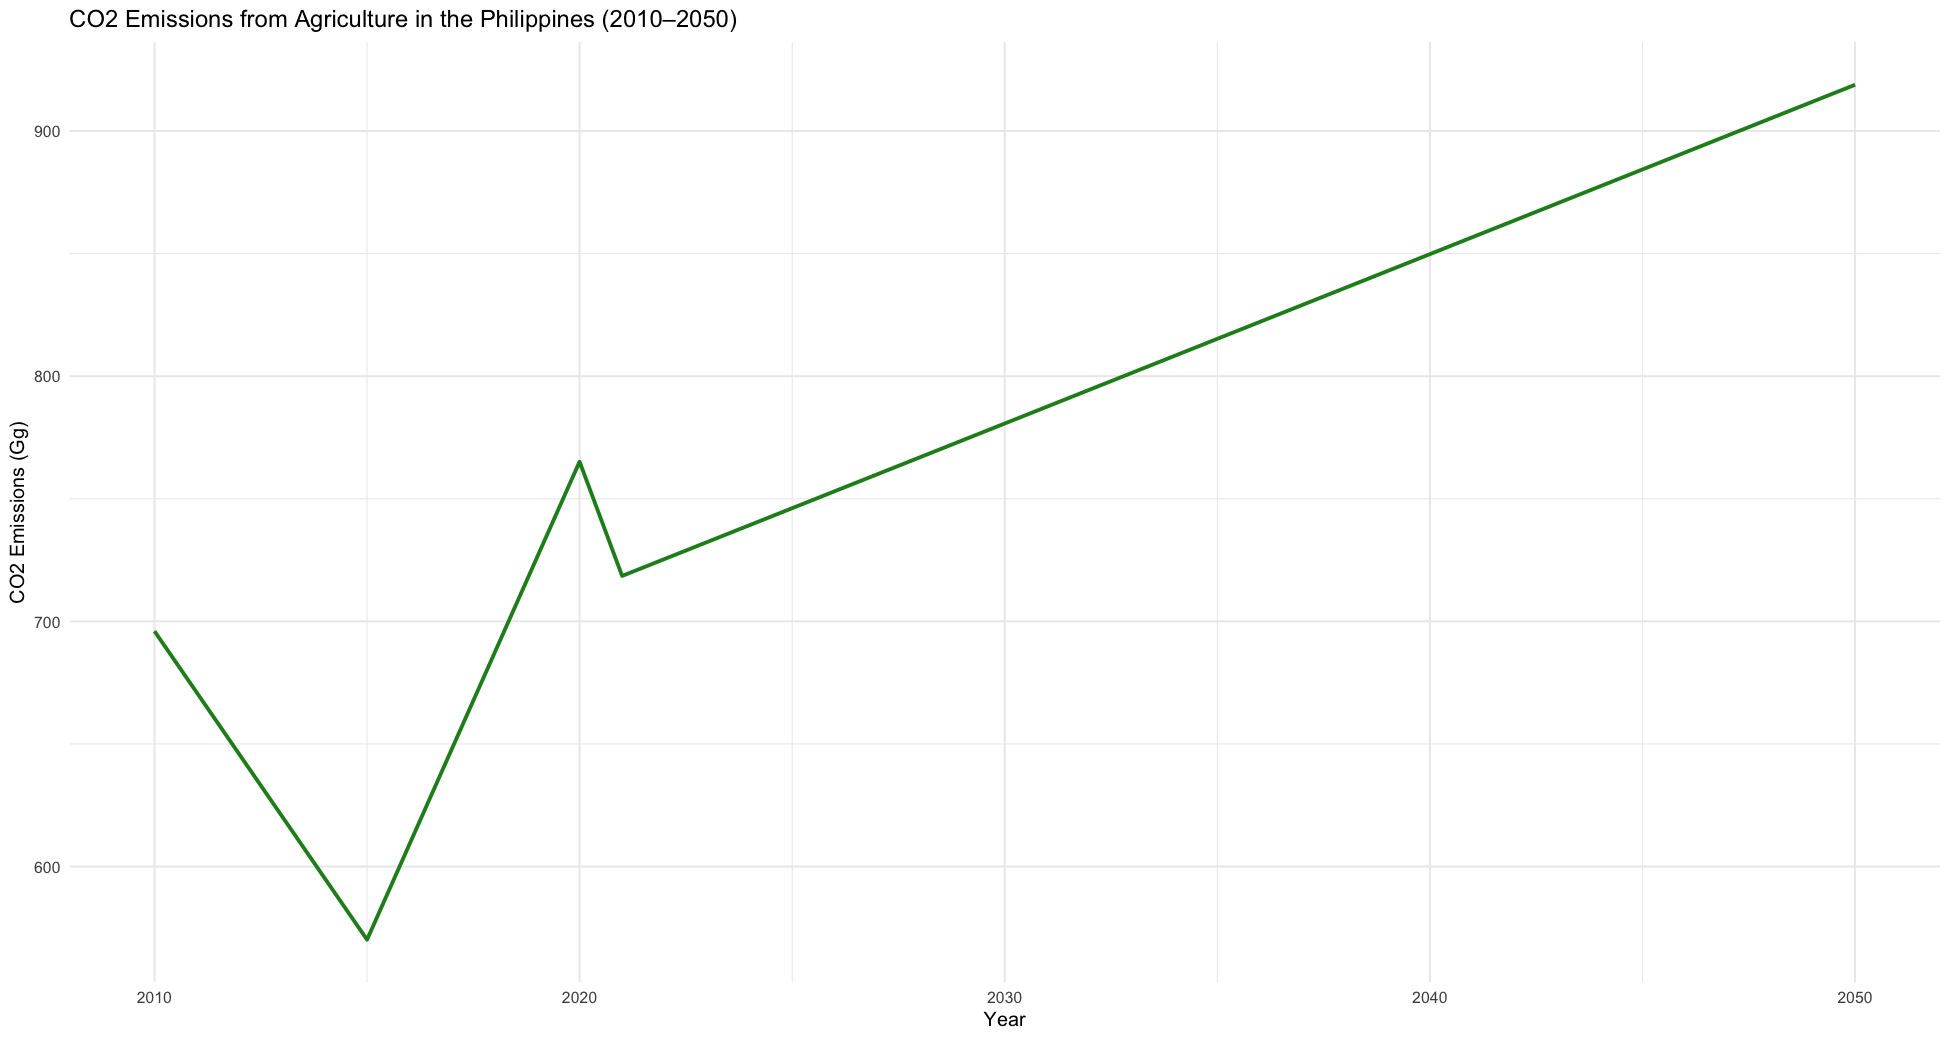

In [148]:
# Example 1
ggplot(agri_emissions, aes(x = Year, y = CO2)) +
  geom_line(color = "forestgreen", linewidth = 1) +
  labs(
    title = "CO2 Emissions from Agriculture in the Philippines (2010–2050)",
    x = "Year",
    y = "CO2 Emissions (Gg)"
  ) +
  theme_minimal()


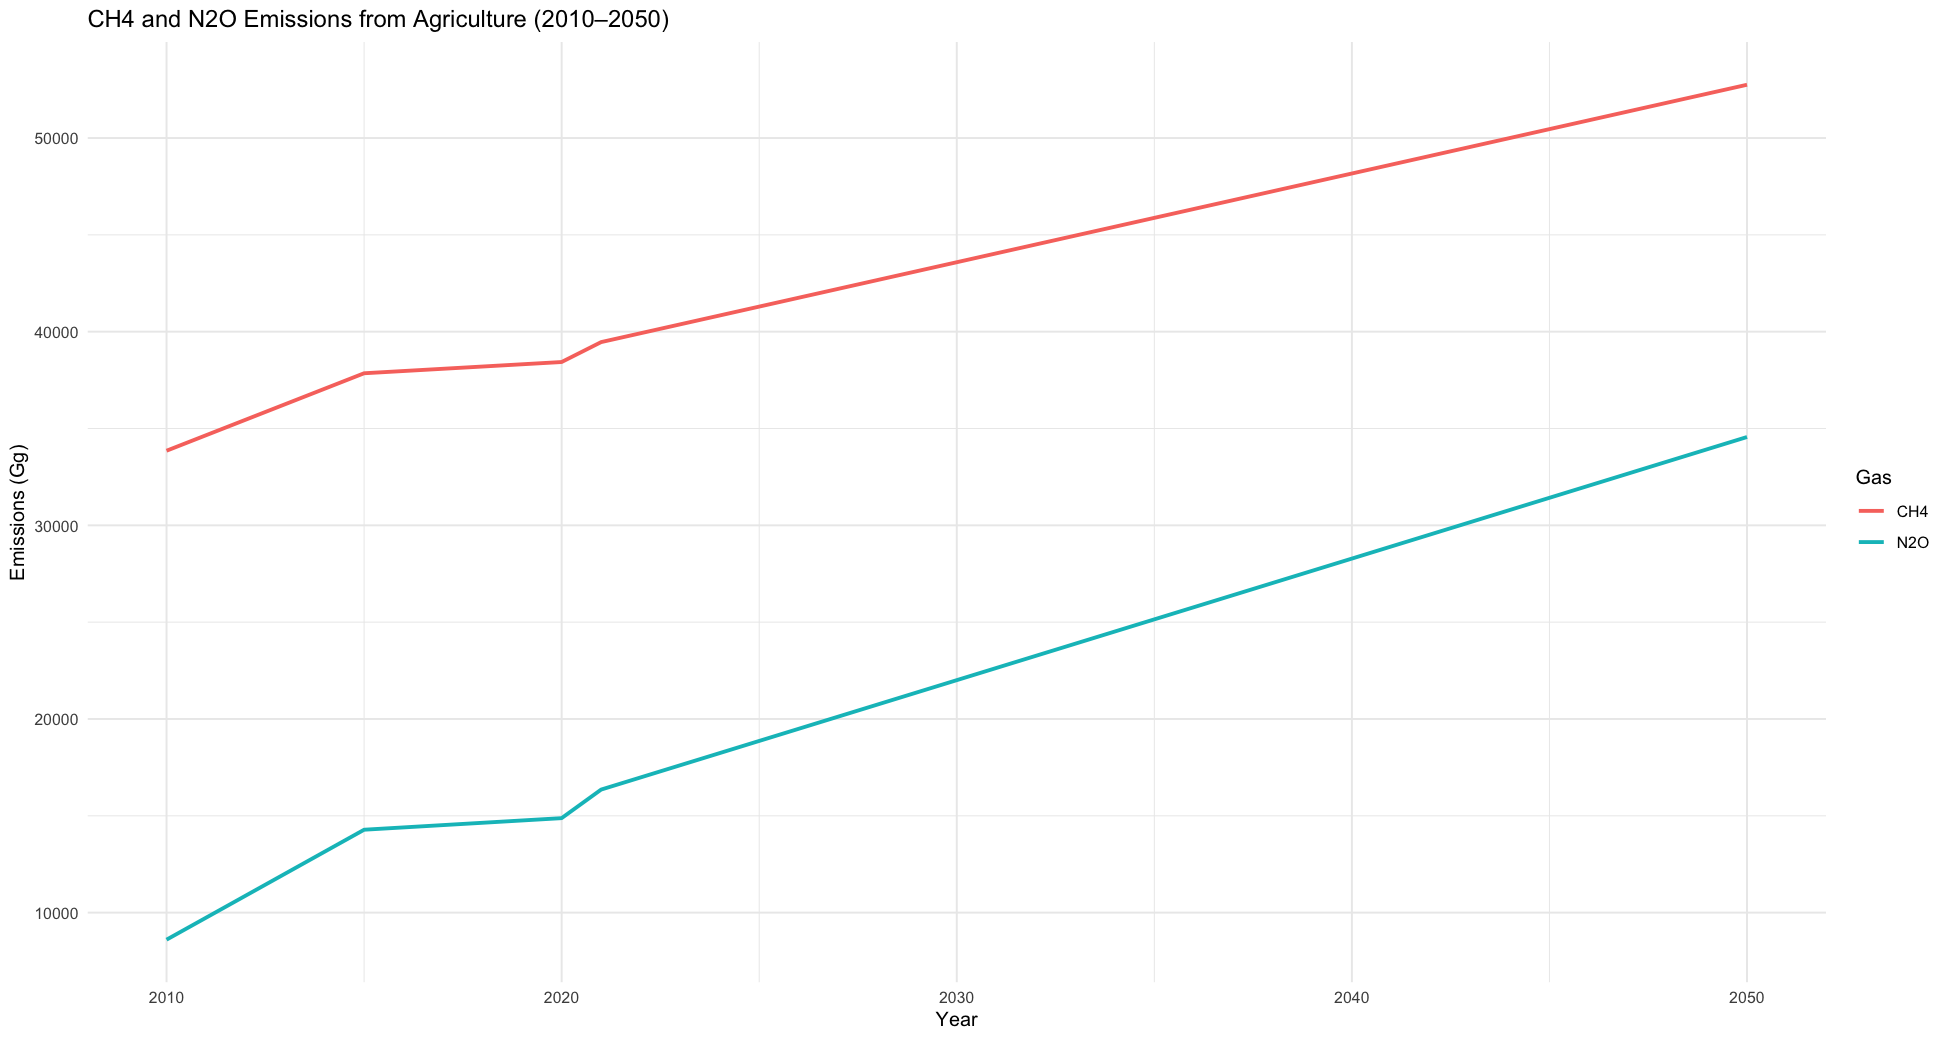

In [149]:
# Example 2 Melt data for easier plotting
agri_long <- melt(agri_emissions, id.vars = c("Year", "Sector"), measure.vars = c("CH4", "N2O"))

ggplot(agri_long, aes(x = Year, y = value, color = variable)) +
  geom_line(size = 1) +
  labs(
    title = "CH4 and N2O Emissions from Agriculture (2010–2050)",
    x = "Year",
    y = "Emissions (Gg)",
    color = "Gas"
  ) +
  theme_minimal()



`summarise()` has grouped output by 'Year'. You can override using the `.groups` argument.


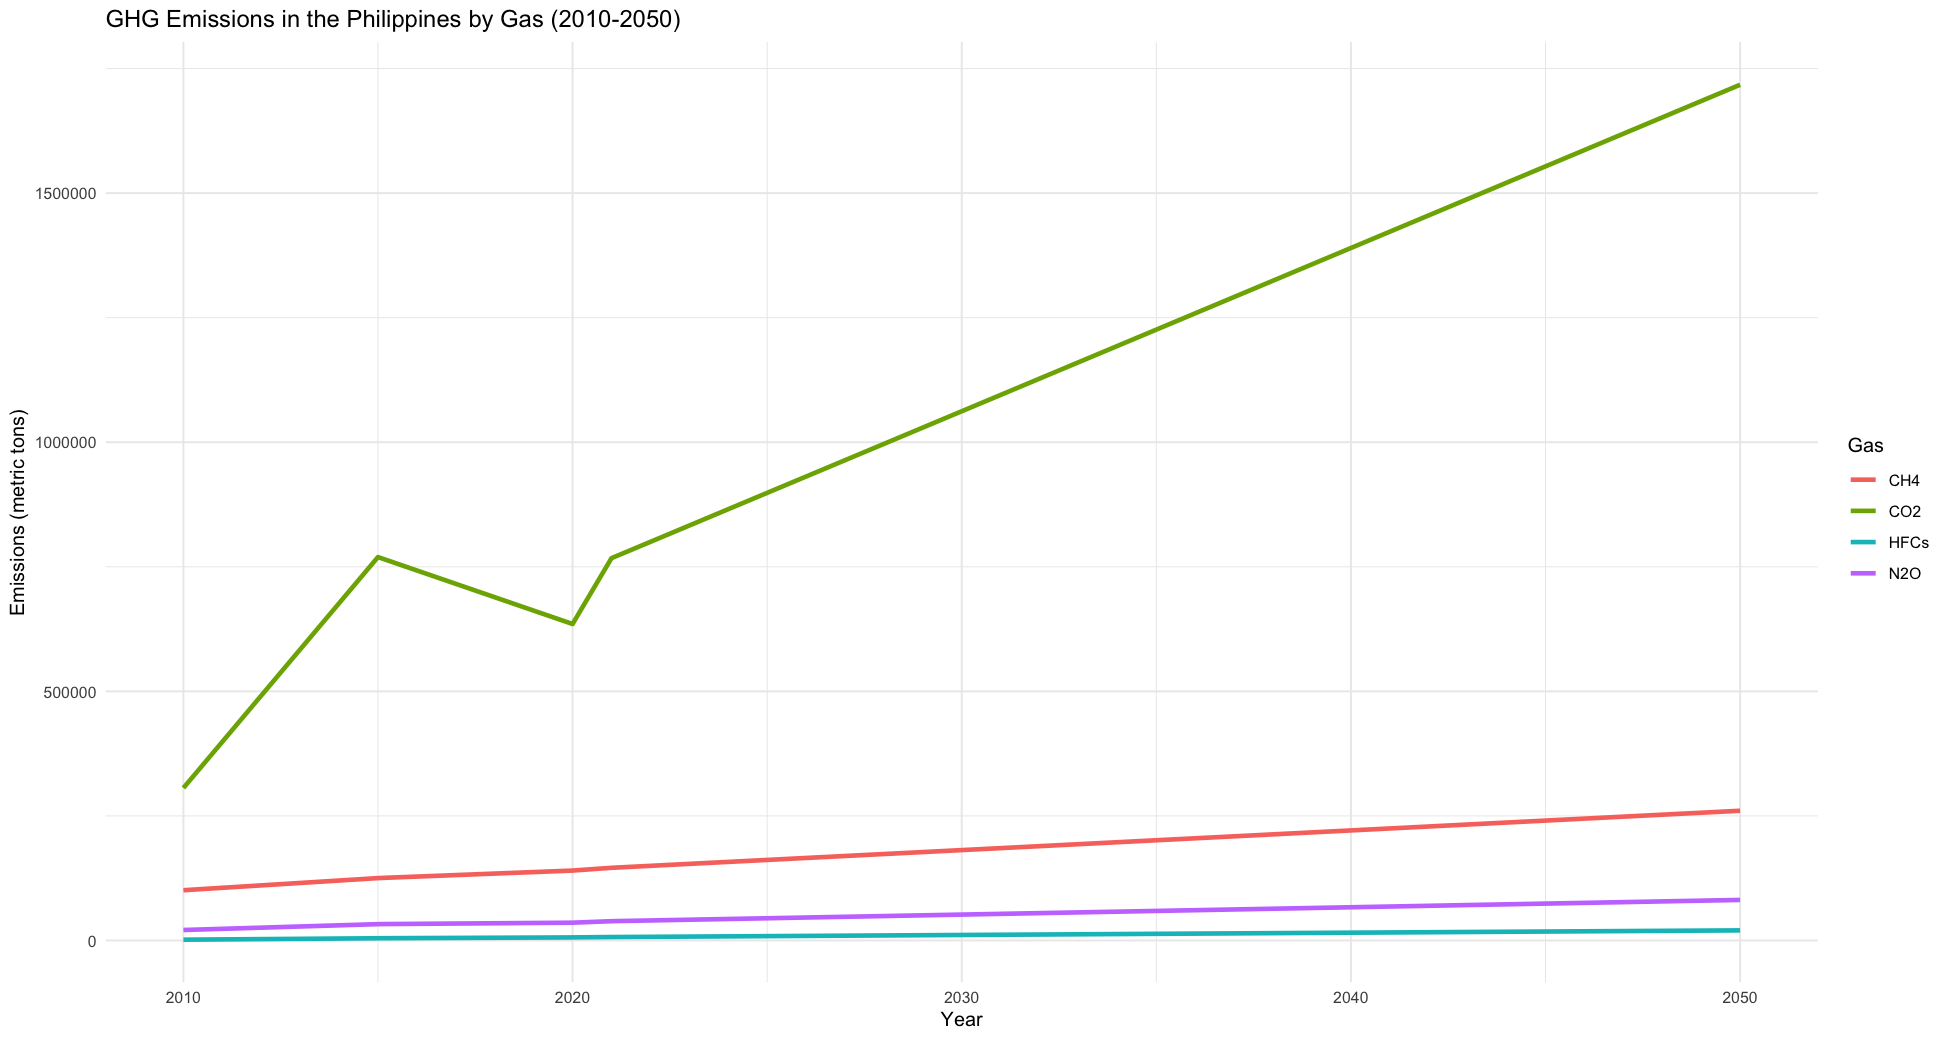

In [150]:
# Example 3 Total emissions by year (sum across all sectors, all gases)
ghg_long <- ghg_data %>%
     pivot_longer(cols = c(CO2, CH4, N2O, HFCs), names_to = "Gas", values_to = "Emissions") %>%
     filter(!is.na(Emissions))

total_emissions_year <- ghg_long %>%
     group_by(Year, Gas) %>%
     summarize(Total = sum(Emissions, na.rm = TRUE))

# Plot: Total emissions by year and gas
ggplot(total_emissions_year, aes(x = Year, y = Total, color = Gas)) +
  geom_line(size = 1.2) +
  labs(title = "GHG Emissions in the Philippines by Gas (2010-2050)",
       y = "Emissions (metric tons)", x = "Year") +
  theme_minimal()

In [151]:
tail(ghg_data, 100)

Year,Sector,CO2,CH4,N2O,HFCs
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2050,WASTES TOTAL CO2 EQUIVALENT,73924.391833,NA,NA,NA
2010,WASTES TOTAL EMISSIONS,15.000000,14527.00,1017.000,NA
2015,WASTES TOTAL EMISSIONS,2.236000,22105.71,1067.771,NA
2020,WASTES TOTAL EMISSIONS,0.322000,28646.32,1475.785,NA
2021,WASTES TOTAL EMISSIONS,-2.954133,30231.27,1462.123,NA
2022,WASTES TOTAL EMISSIONS,-4.421933,31643.21,1508.001,NA
2023,WASTES TOTAL EMISSIONS,-5.889733,33055.14,1553.880,NA
2024,WASTES TOTAL EMISSIONS,-7.357533,34467.07,1599.759,NA
2025,WASTES TOTAL EMISSIONS,-8.825333,35879.00,1645.637,NA


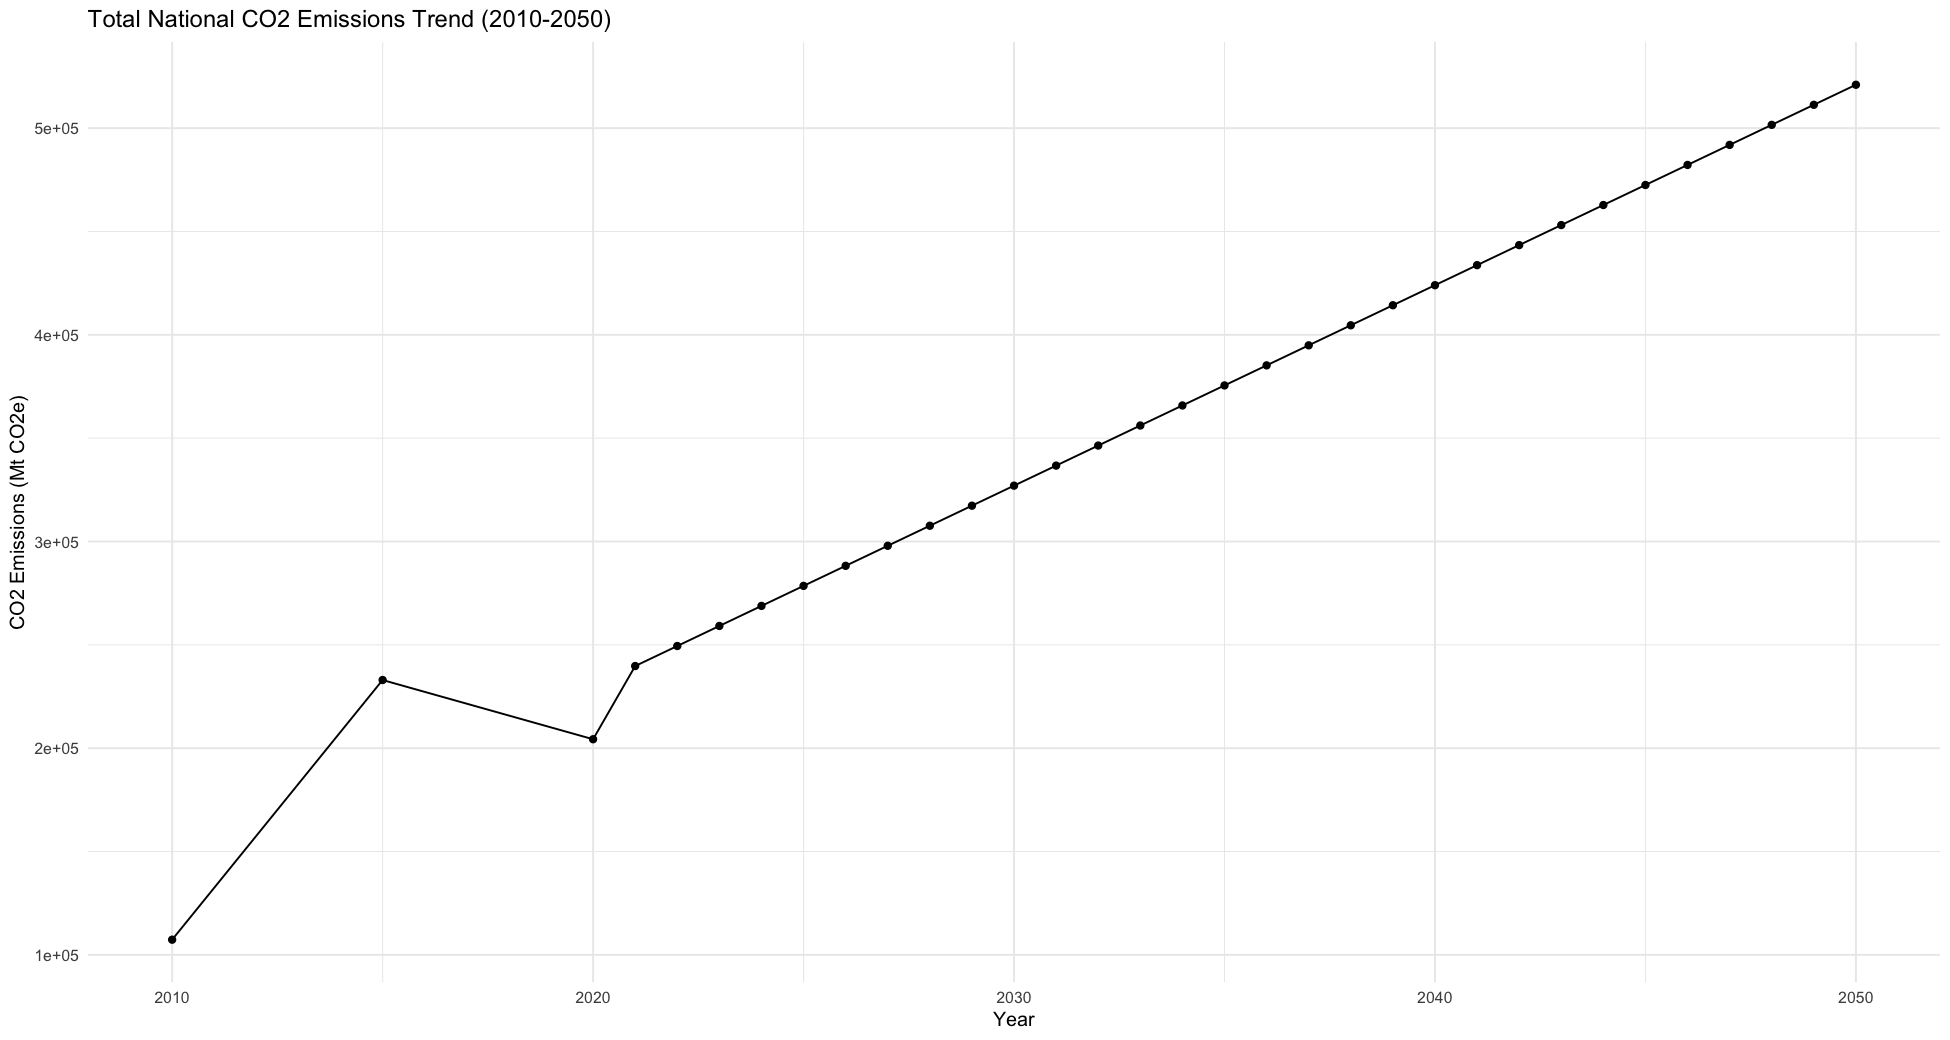

In [152]:
# Example 4 Create time series visualization
ghg_data %>%
  filter(Sector == "TOTAL NATIONAL GHG EMISSIONS (CO2-e)") %>%
  ggplot(aes(x = Year, y = CO2)) +
  geom_line() +
  geom_point() +
  theme_minimal() +
  labs(title = "Total National CO2 Emissions Trend (2010-2050)",
       x = "Year", 
       y = "CO2 Emissions (Mt CO2e)")

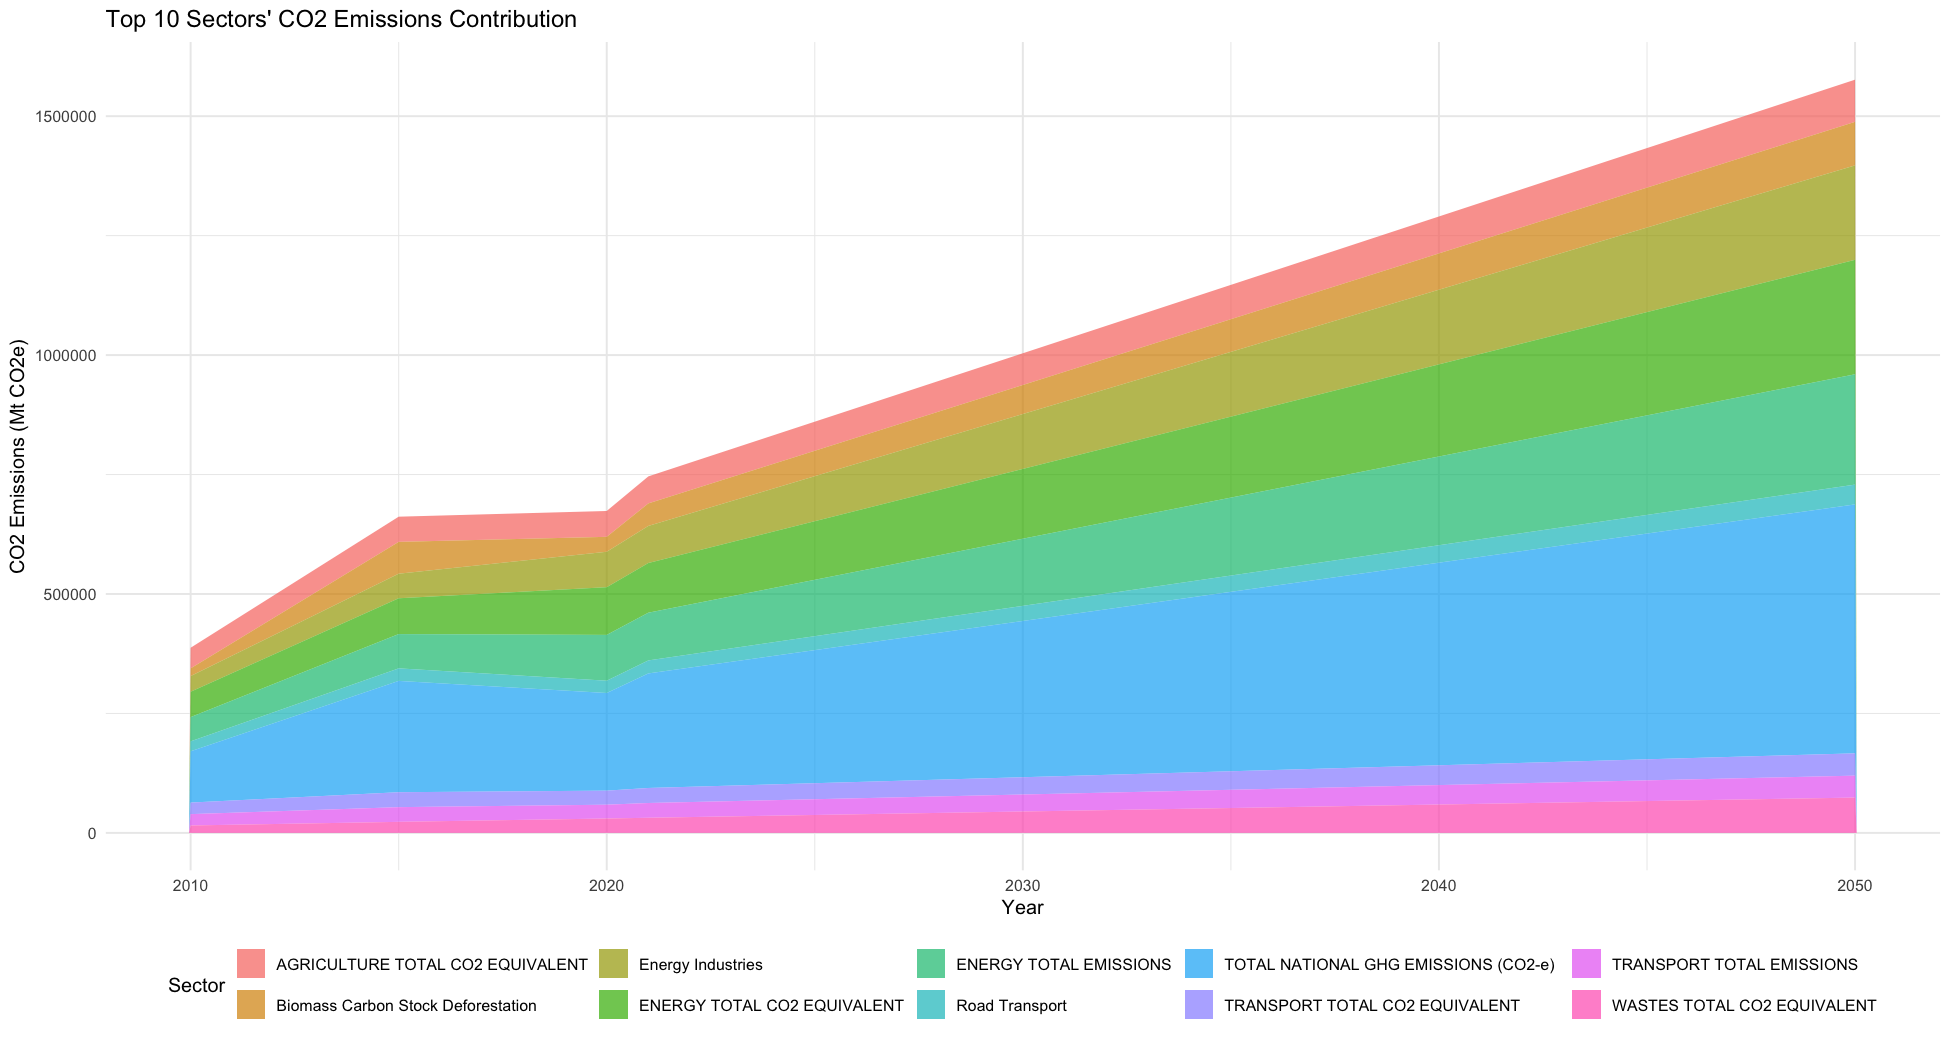

In [153]:
# Example 5 Stacked area chart for top sectors
top_sectors <- ghg_data %>%
  group_by(Sector) %>%
  summarise(total_emissions = sum(CO2)) %>%
  arrange(desc(total_emissions)) %>%
  head(10)

ghg_data %>%
  filter(Sector %in% top_sectors$Sector) %>%
  ggplot(aes(x = Year, y = CO2, fill = Sector)) +
  geom_area(alpha = 0.7) +
  theme_minimal() +
  theme(legend.position = "bottom") +
  guides(fill = guide_legend(nrow = 2)) +
  labs(title = "Top 10 Sectors' CO2 Emissions Contribution",
       x = "Year", 
       y = "CO2 Emissions (Mt CO2e)")

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


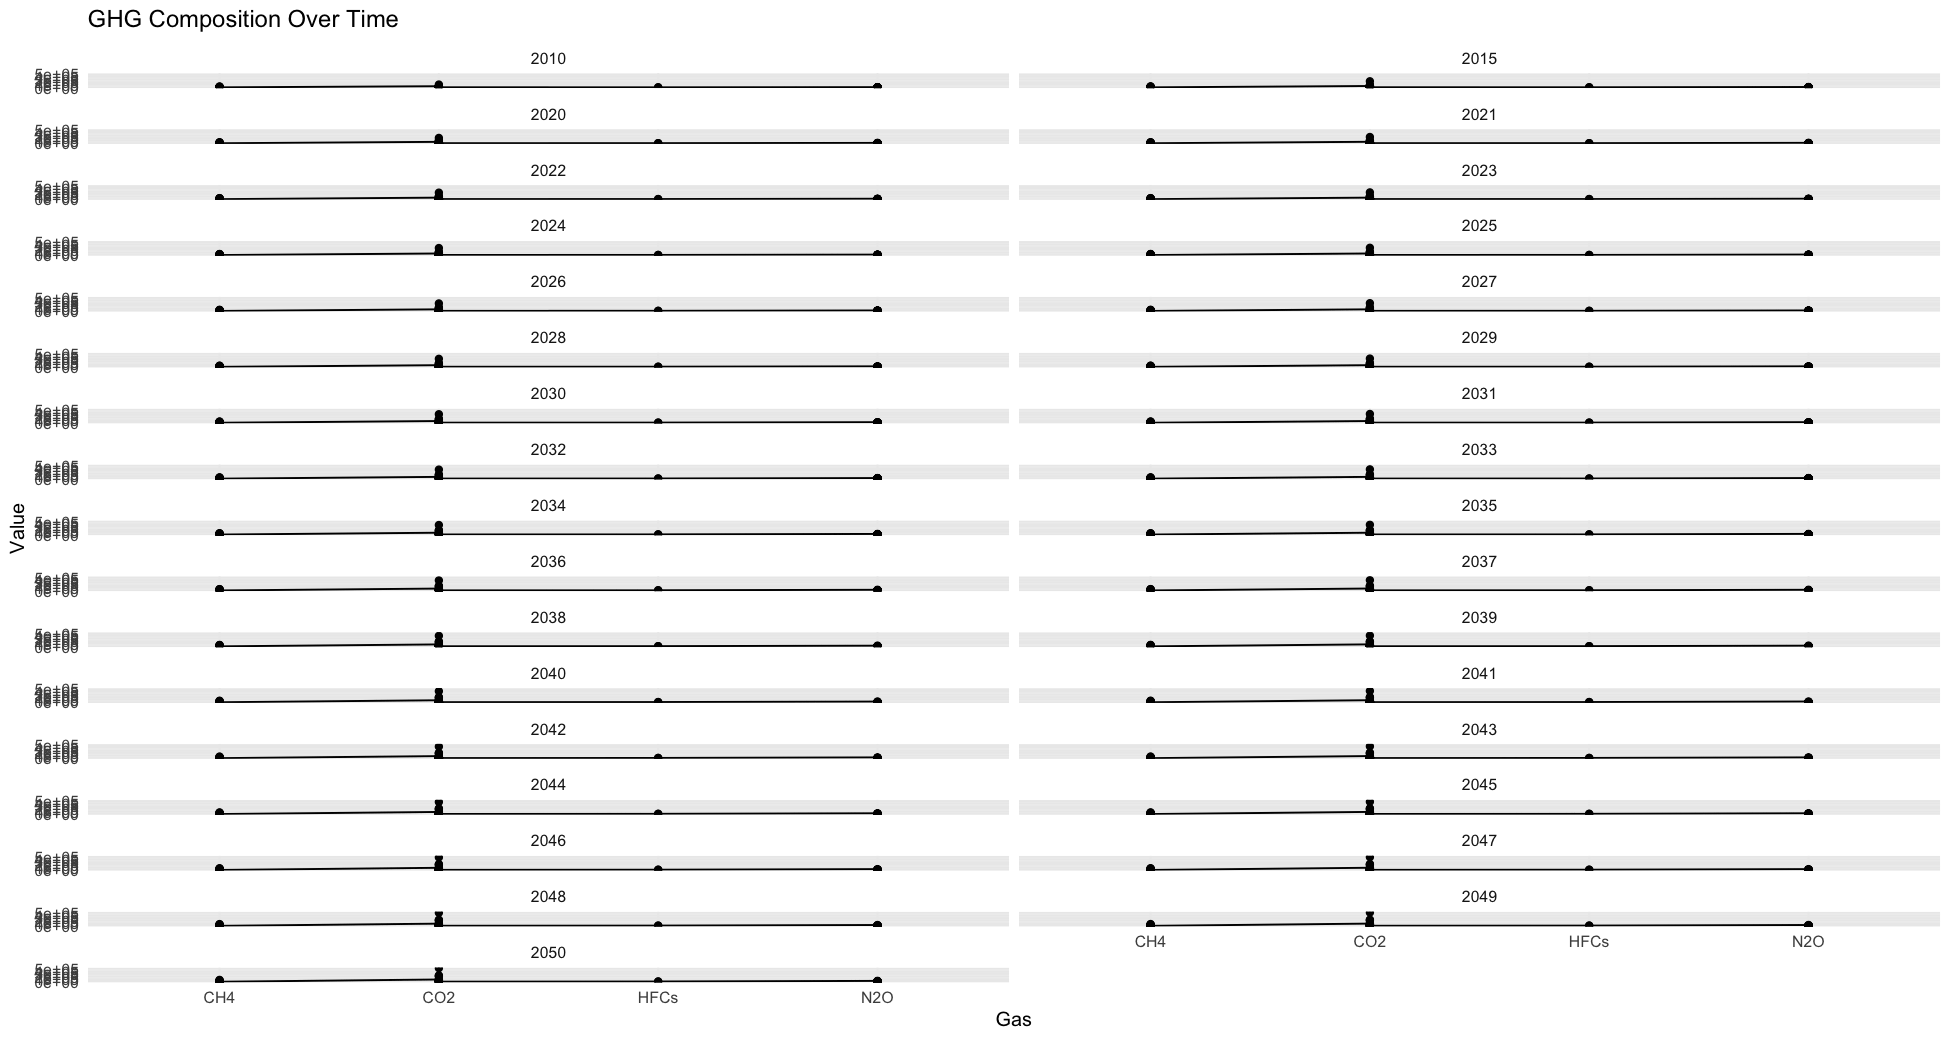

In [154]:
# Example 6 Create radar/spider plot with NA handling
gas_data <- ghg_data %>%
  select(Year, Sector, CO2, CH4, N2O, HFCs) %>%
  pivot_longer(
    cols = c(CO2, CH4, N2O, HFCs),
    names_to = "Gas",
    values_to = "Value",
    values_drop_na = TRUE  # Remove rows with NA values
  )

# Create plot with custom scale limits
ggplot(gas_data, aes(x = Gas, y = Value, group = Year)) +
  geom_line() +
  geom_point() +
  coord_polar(theta = "x") +
  facet_wrap(~ Year, ncol = 2) +
  theme_minimal() +
  labs(title = "GHG Composition Over Time") +
  coord_cartesian(ylim = c(0, max(gas_data$Value, na.rm = TRUE)))

## **Descriptive Statistics by Gas and Sector**

### Summary Statistics for Each Gas (CO₂, CH₄, N₂O, HFCs)**

The table presents descriptive statistics for each greenhouse gas (CH₄, CO₂, HFCs, and N₂O) in the Philippines from 2010 to 2050 based on your synthetic dataset. The summary shows major differences in scale, central tendency, and spread between gases.

In [155]:
# Gather the gas columns into long format
ghg_long <- ghg_data %>%
  tidyr::pivot_longer(cols = c(CO2, CH4, N2O, HFCs), names_to = "Gas", values_to = "Emissions")

# Remove rows with NA emissions
ghg_long <- ghg_long %>% filter(!is.na(Emissions))

# Summary statistics by Gas
summary_stats_gas <- ghg_long %>%
  group_by(Gas) %>%
  summarise(
    count = n(),
    mean = mean(Emissions, na.rm=TRUE),
    median = median(Emissions, na.rm=TRUE),
    sd = sd(Emissions, na.rm=TRUE),
    min = min(Emissions, na.rm=TRUE),
    max = max(Emissions, na.rm=TRUE),
    sum = sum(Emissions, na.rm=TRUE)
  )
print(summary_stats_gas)

# A tibble: 4 × 8
  Gas   count   mean  median     sd       min     max       sum
  <chr> <int>  <dbl>   <dbl>  <dbl>     <dbl>   <dbl>     <dbl>
1 CH4     883  7314.    65.3 14554.    -217.   71177.  6458398.
2 CO2    1117 34899. 10671.  77955. -132995.  520983. 38982487.
3 HFCs     66  6328.  6412.   2375.     771    10103.   417622.
4 N2O     814  2321.   337.   5360.     -33.3  34560.  1889395.


### Visualizing the Distribution of Emissions

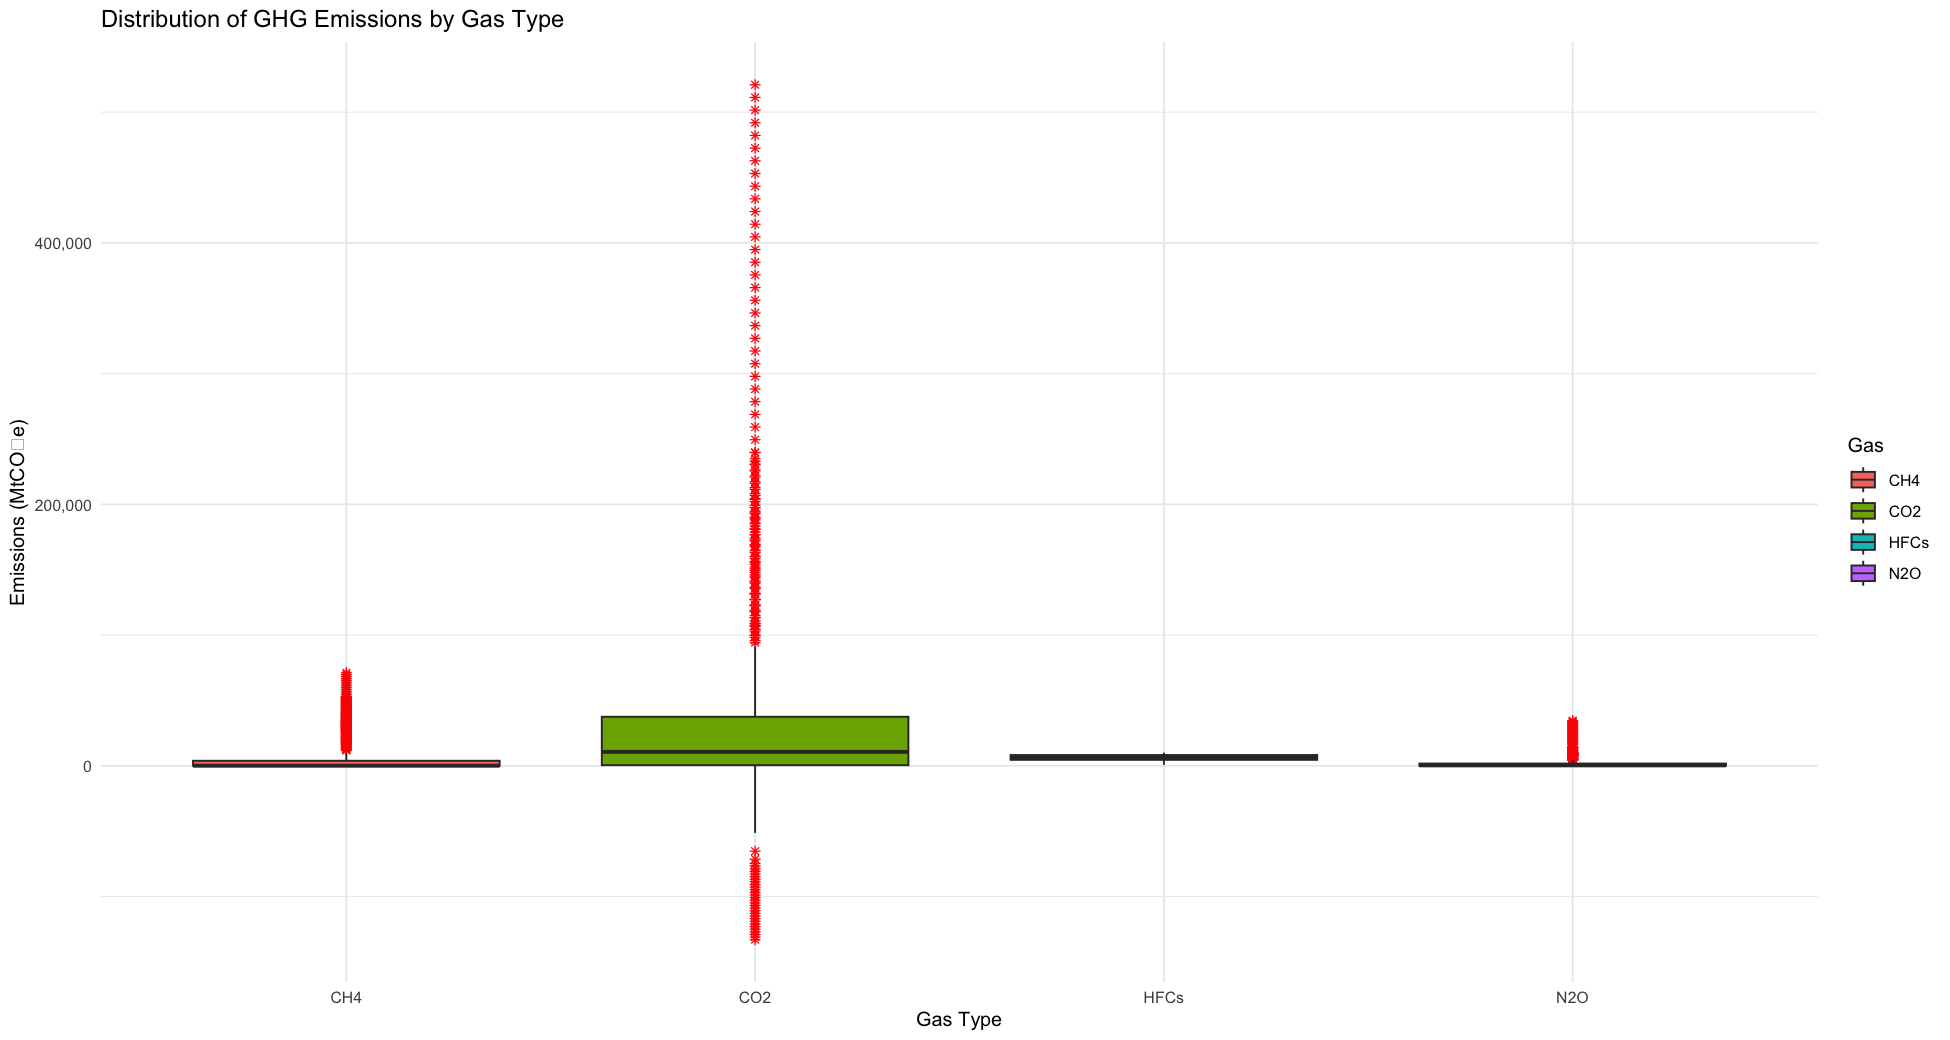

In [156]:
# --- Boxplot: Emissions Distribution by Gas ---
# This highlights: Median and IQR, Outliers (esp. CH4 and CO2), Skewness (e.g., CH4’s low median vs. high mean)

ggplot(ghg_long, aes(x = Gas, y = Emissions, fill = Gas)) +
  geom_boxplot(outlier.colour = "red", outlier.shape = 8) +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Distribution of GHG Emissions by Gas Type",
       y = "Emissions (MtCO₂e)", x = "Gas Type") +
  theme_minimal()


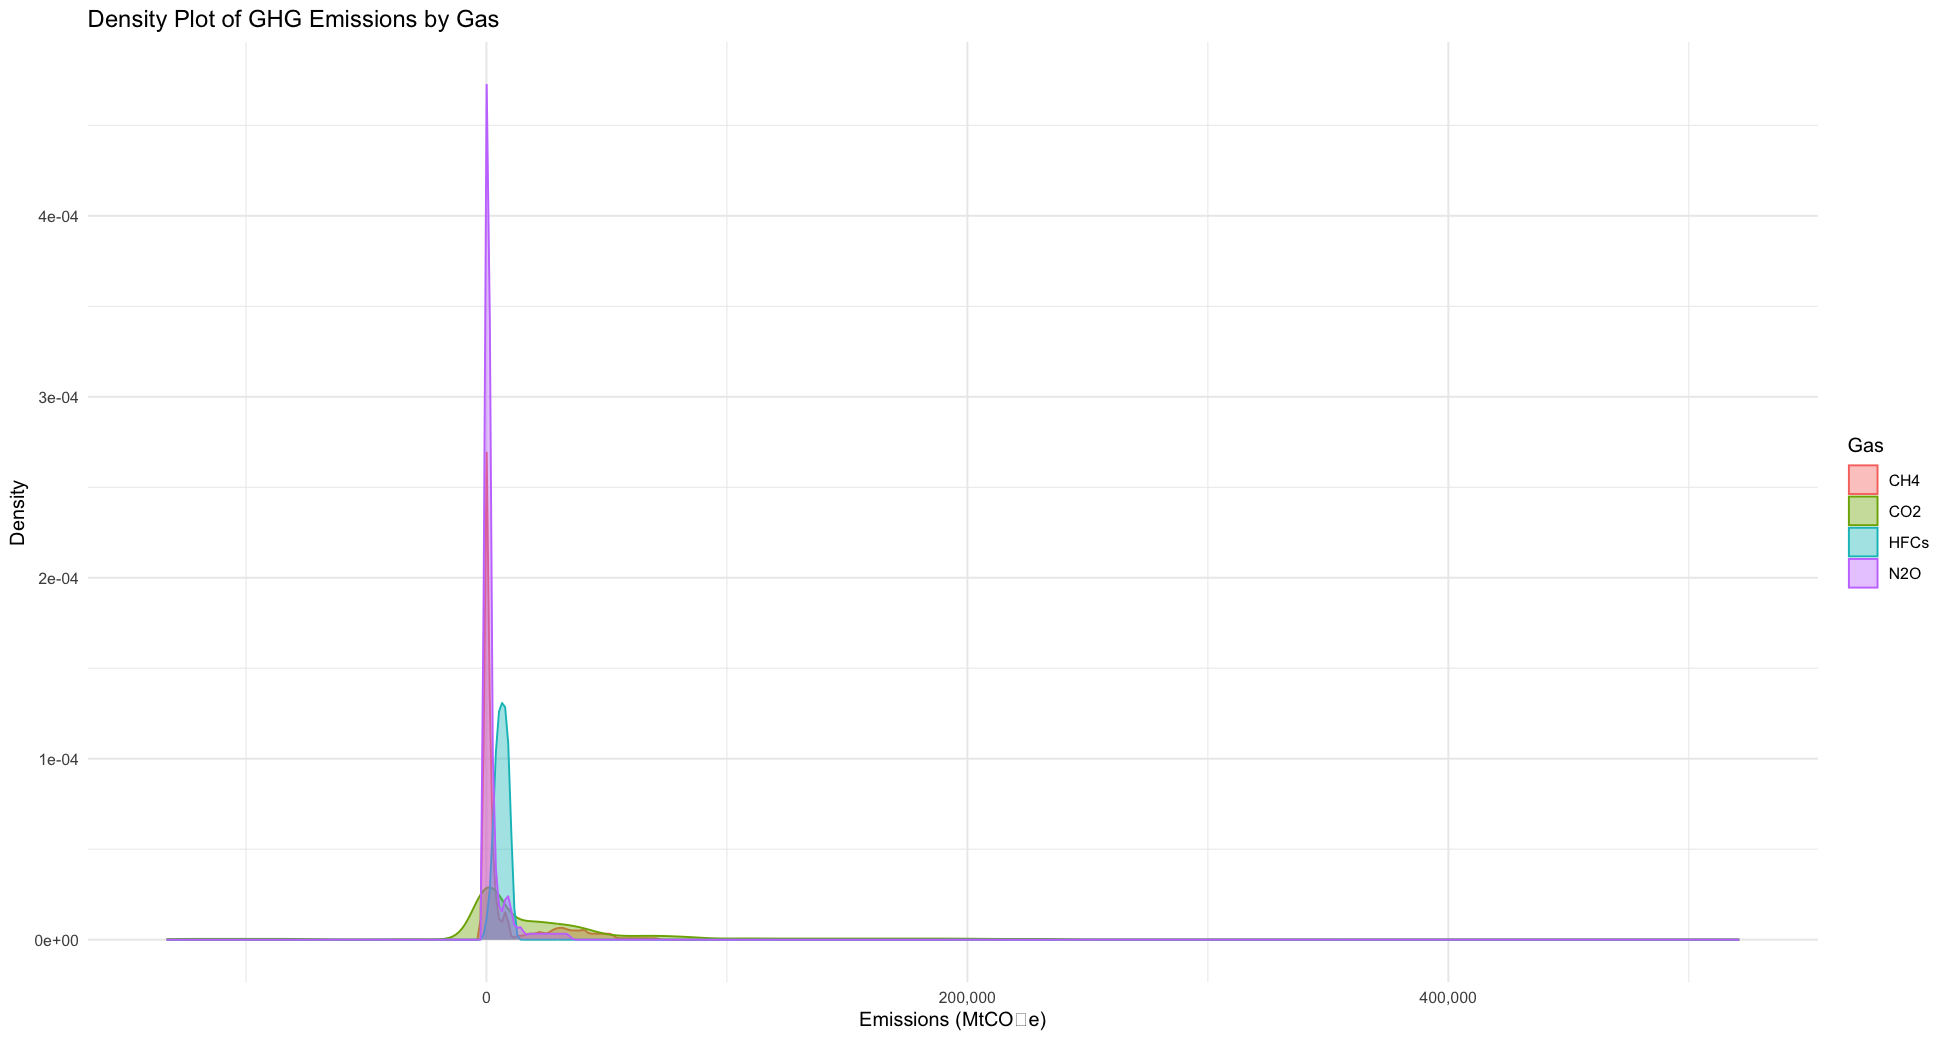

In [165]:
# --- Density Plot: Emissions by Gas (Optional with log scale) ---
# This shows: How emissions are concentrated or dispersed and Clearer insight into overlapping distributions

ggplot(ghg_long, aes(x = Emissions, fill = Gas, color = Gas)) +
  geom_density(alpha = 0.4) +
  scale_x_continuous(labels = scales::comma) +
  labs(title = "Density Plot of GHG Emissions by Gas",
       x = "Emissions (MtCO₂e)", y = "Density") +
  theme_minimal()


### Statistical Patterns Findings:

**CO₂ dominates emissions**:

   * With a **mean** of \~34,899 and a **sum** of \~39 million, CO₂ is the most significant GHG contributor by a large margin.
   * The **wide standard deviation (77,955)** indicates strong variability—possibly due to sectoral differences or future projection uncertainty.
   * The **minimum of -132,995** is suspicious and may indicate data artifacts or anomalies in synthetic generation.

**CH₄ (Methane)**:

   * Has a large standard deviation relative to its mean, showing **high variance and outliers**.
   * Its **median (65.3)** is much lower than the mean (7,314), suggesting a **right-skewed distribution**.

**N₂O (Nitrous Oxide)**:

   * Also shows skewed distribution with a **mean of 2,321** and **median of only 337**.
   * The **negative minimum (-33.3)** suggests either data anomalies or rounding in projection algorithms.

**HFCs (Hydrofluorocarbons)**:

   * Lowest observation count (66), likely due to limited sectoral data.
   * Comparatively **narrow spread**, suggesting more consistent use or reporting.


**Distribution Analysis**  - CO2 shows the most extreme values:
    - Largest range: -132,995 to 520,983
    - Highest mean: 34,899
    - Largest sum: 38,982,487


  - HFCs shows most consistent distribution:
    - Smallest SD: 2,375
    - Mean (6,328) close to median (6,412)
    - Narrowest range: 771 to 10,103


**Outlier Detection**  - Negative values in CH4 (-217) and CO2 (-132,995) indicate potential data quality issues
  - Large standard deviations suggest significant variability:
    - CO2: 77,955
    - CH4: 14,554
    - N2O: 5,360
    - HFCs: 2,375


**Data Completeness**  - CO2 has most observations (1,117)
  - HFCs has least observations (66)
  - Missing data patterns may indicate reporting gaps



### Environmental Implications

**Emissions Magnitude**  - CO2 dominates total emissions (38.98M)
  - CH4 second highest (6.46M)
  - N2O and HFCs contribute smaller portions


**Variability Patterns**  - High standard deviations suggest:
    - Seasonal variations
    - Sector-specific patterns
    - Reporting inconsistencies

**Data Quality Concerns**  - Negative values require investigation
  - Large differences between mean and median indicate skewed distributions
  - Uneven observation counts across gases may affect trend analysis

This statistical summary reveals complex patterns in greenhouse gas emissions, with CO2 showing the most significant impact and variability. The presence of negative values and large standard deviations suggests the need for data validation and quality control measures.


### Summary Statistics by Sector

In [168]:
summary_stats_sector <- ghg_long %>%
  group_by(Sector, Gas) %>%
  summarise(
    mean = mean(Emissions, na.rm=TRUE),
    sum = sum(Emissions, na.rm=TRUE),
    min = min(Emissions, na.rm=TRUE),
    max = max(Emissions, na.rm=TRUE),
    .groups = 'drop'
  )
print(head(summary_stats_sector, 20)) # Show first 20 rows

# A tibble: 20 × 6
   Sector                                  Gas      mean     sum     min     max
   <chr>                                   <chr>   <dbl>   <dbl>   <dbl>   <dbl>
 1 AGRICULTURE TOTAL CO2 EQUIVALENT        CO2    7.03e4  2.32e6  4.32e4  8.82e4
 2 AGRICULTURE TOTAL EMISSIONS             CH4    4.53e4  1.49e6  3.39e4  5.28e4
 3 AGRICULTURE TOTAL EMISSIONS             CO2    8.06e2  2.66e4  5.70e2  9.19e2
 4 AGRICULTURE TOTAL EMISSIONS             N2O    2.43e4  8.01e5  8.60e3  3.46e4
 5 Biological Treatment of Solid Waste     CH4    8.31e2  2.74e4  3.5 e1  1.41e3
 6 Biological Treatment of Solid Waste     N2O    4.53e2  1.49e4  3.2 e1  7.64e2
 7 Biomass Burning - Forests               CH4    7   e0  2.17e2  7   e0  7   e0
 8 Biomass Burning - Forests               CO2    7.51e2  2.40e4  7.45e2  9.37e2
 9 Biomass Burning - Forests               N2O    2   e0  6.2 e1  2   e0  2   e0
10 Biomass Burning in Croplands and Grass… CH4    4.94e2  1.63e4  2.86e2  6.32e2
11 Biomas

#### Heatmap of Mean Emissions by Sector and Gas

#### Statistical Patterns Findings:

**Agriculture Sector Patterns**  - Highest mean emissions: 70,300 units (CO2 equivalent)
  - Significant variability: min 43,200, max 88,200 units
  - Multiple gas types: CO2, CH4, and N2O emissions
  - Dominant CH₄ and N₂O emitter (e.g., rice paddies, manure, soils).
  - Small CO₂ but large total emissions when all gases are considered.

**Biomass Carbon Stock Analysis**  - Complex patterns across different types:
    - Deforestation: highest positive impact (66,300 units)
    - Silvopasture: significant negative impact (-100,000 units)
    - Agroforestry: mixed impact with negative minimum (-13,000 units)
    - Positive CO₂ emissions in deforestation.
    - Negative CO₂ emissions in silvopasture → indicates carbon sequestration!

**Industrial Sector Patterns**  - Chemical Industry shows consistent but low emissions:
    - CH4: 21 units (min 21, max 22)
    - CO2: 561 units (min 560, max 596)
    - N2O: 19 units (consistent)

**Agricultural Soil Management**  - Managed Soils: high N2O emissions (8,530 units mean)
  - Manure Management: moderate N2O emissions (2,440 units mean)
  - Both show significant variability in min/max values
    
**Waste Management**
  - Biological treatment emits both CH₄ and N₂O.
  - Emissions here are smaller but notable due to their GWP (global warming potential).


#### Statistical Distribution Analysis

**Range Analysis**  - Largest range: Biomass Carbon Stock Silvopasture (-133,000 to -51,300)
  - Smallest range: Chemical Industry CH4 (21-22)
  - Most variable: Agriculture CO2 equivalent (43,200-88,200)


**Mean-Median Relationships**  - Most sectors show similar means and medians
  - Biomass Carbon Stock Agroforestry shows widest mean-median difference
  - Indicates relatively normal distributions


**Summation Patterns**  - Highest total: Agriculture CO2 equivalent (2.32M)
  - Lowest total: Biomass Burning - Forests CH4 (217)
  - Most sectors show consistent summation patterns


### Environmental Implications

**Carbon Sequestration**  - Biomass Carbon Stock Silvopasture shows significant negative emissions
  - Indicates effective carbon capture mechanisms
  - Requires further investigation of sustainability


**Agricultural Impact**  - Multiple emission types from single sector
  - High variability suggests opportunity for optimization
  - Need for balanced agricultural practices

**Industrial Efficiency**  - Consistent low emissions from Chemical Industry
  - Suggests effective emission controls
  - Potential model for other sectors


### Total Emissions by Sector (Faceted by Gas)

- For CO₂, Deforestation and Silvopasture dominate.
- For CH₄, Agriculture and Waste Treatment are significant.
- For N₂O, Soil management and Manure are main contributors.
- For HFCs, only select industrial sectors are relevant.

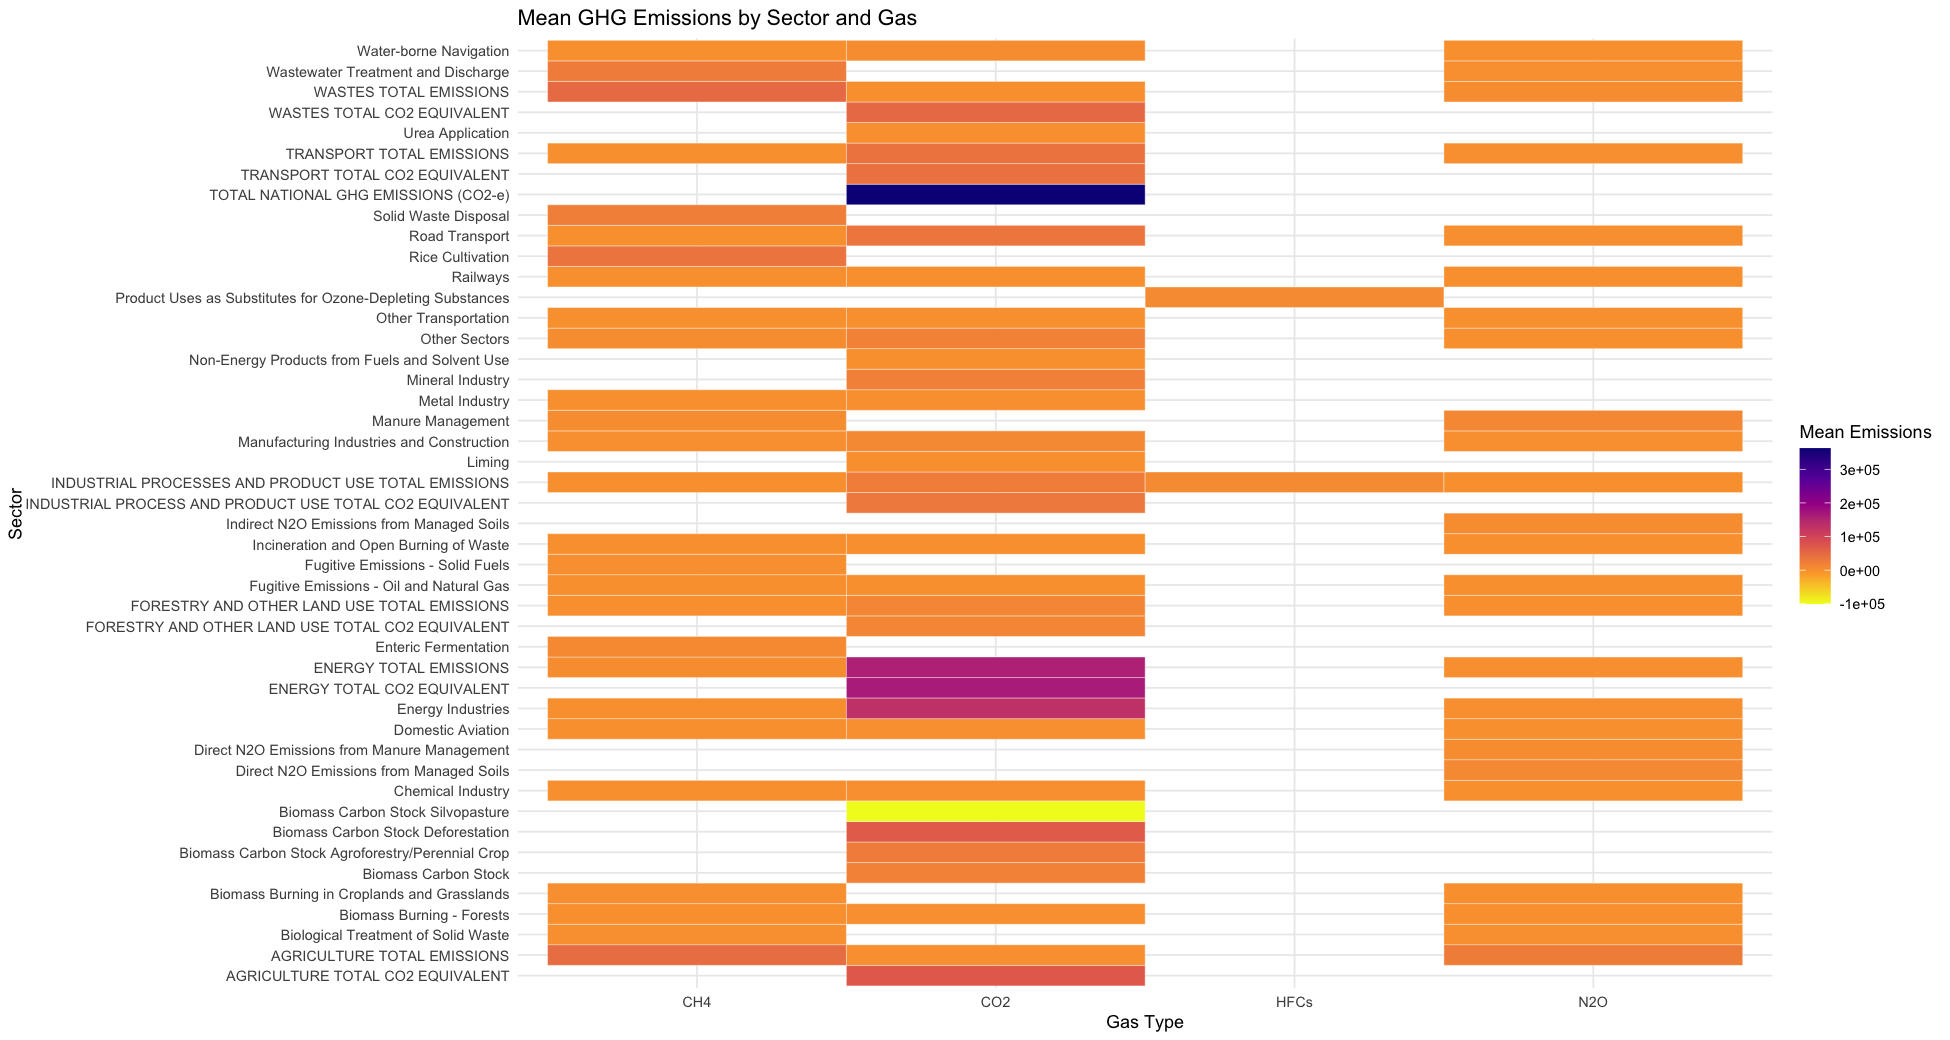

In [166]:
# Clean sector names for better plot readability
summary_stats_sector_clean <- summary_stats_sector %>%
  mutate(Sector = stringr::str_wrap(Sector, width = 100))

ggplot(summary_stats_sector_clean, aes(x = Gas, y = Sector, fill = mean)) +
  geom_tile(color = "white") +
  scale_fill_viridis_c(option = "C", direction = -1) +
  labs(title = "Mean GHG Emissions by Sector and Gas",
       x = "Gas Type", y = "Sector", fill = "Mean Emissions") +
  theme_minimal(base_size = 10)


In [ ]:
ggplot(summary_stats_sector_clean, aes(x = reorder(Sector, -sum), y = sum, fill = Gas)) +
  geom_col() +
  facet_wrap(~Gas, scales = "free") +
  coord_flip() +
  labs(title = "Total Emissions by Sector (Faceted by Gas)",
       x = "Sector", y = "Total Emissions") +
  theme_minimal() +
  theme(legend.position = "none")

### Top Sectors by Total Emissions Over Time

In [167]:
# Total emissions by sector (sum all gases)
top_sectors <- ghg_long %>%
  group_by(Sector) %>%
  summarise(Total_Emissions = sum(Emissions, na.rm=TRUE)) %>%
  arrange(desc(Total_Emissions))

print(head(top_sectors, 20))


# A tibble: 20 × 2
   Sector                                                  Total_Emissions
   <chr>                                                             <dbl>
 1 TOTAL NATIONAL GHG EMISSIONS (CO2-e)                          11955521.
 2 ENERGY TOTAL EMISSIONS                                         5381527.
 3 ENERGY TOTAL CO2 EQUIVALENT                                    5381477.
 4 Energy Industries                                              4302341.
 5 AGRICULTURE TOTAL EMISSIONS                                    2321413.
 6 AGRICULTURE TOTAL CO2 EQUIVALENT                               2321363.
 7 Biomass Carbon Stock Deforestation                             2188190.
 8 WASTES TOTAL CO2 EQUIVALENT                                    1653080.
 9 WASTES TOTAL EMISSIONS                                         1653080.
10 TRANSPORT TOTAL EMISSIONS                                      1256715.
11 TRANSPORT TOTAL CO2 EQUIVALENT                                 1256715.
12 Roa